# NLP 제대로 맛보기
13기 이유민

### < 조건 >
- 텍스트 데이터 크롤링
- 전처리
- 토크나이징
- 임베딩
- 인사이트 도출
---

- 제목과 평점으로 시도했으나 평점은 쓰지 못했습니다 ㅠㅠ

# 0. 모듈 import

In [1]:
import requests
from bs4 import BeautifulSoup
import re
from pandas import DataFrame

# 1. 네이버 웹툰 회차별 제목/평점 크롤링

In [2]:
# 1. 기본 설정
url = 'https://comic.naver.com/webtoon/list.nhn?titleId=651673&weekday=wed' # 네이버 수요웹툰 '유미의 세포들' 페이지 url
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html)

C:\Users\lcm01\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\lcm01\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [3]:
t_url = []
for i in range(47):
    pre = "https://comic.naver.com/webtoon/list.nhn?titleId=651673&weekday=wed&page=" + str(i)
    t_url.append(pre)
            # 페이지 주소 추출!

title = [] # 제목 받을 list 생성
score = [] # 평점 받을 list 생성

for i in range(47): 
    url = t_url[i]
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html)
    pre_tit = soup.select('td[class="title"] a', limit=10) # 한 페이지당 10화
    title.append(pre_tit)
    pre_score = soup.select('strong', limit=10)
    score.append(pre_score)

In [4]:
title = sum(title, []) # list flatten

In [5]:
for i in range(len(title)):
    title[i] = title[i].get_text()
    
title
# '(회차)화 제목' 형태로 불러옵니다  
# ex) 467화 너무 늦지 않았나요?

['468화 프라임 사랑 세포',
 '467화 너무 늦지 않았나요?',
 '466화 소개팅 2',
 '465화 소개팅 1',
 '464화 추억의 연상효과',
 '463화 잘 지내고 싶어(얘랑)',
 '462화 나중에 꼭 돌려주세요 끝',
 '461화 나중에 꼭 돌려주세요 3',
 '460화 나중에 꼭 돌려주세요 2',
 '459화 나중에 꼭 돌려주세요 1',
 '468화 프라임 사랑 세포',
 '467화 너무 늦지 않았나요?',
 '466화 소개팅 2',
 '465화 소개팅 1',
 '464화 추억의 연상효과',
 '463화 잘 지내고 싶어(얘랑)',
 '462화 나중에 꼭 돌려주세요 끝',
 '461화 나중에 꼭 돌려주세요 3',
 '460화 나중에 꼭 돌려주세요 2',
 '459화 나중에 꼭 돌려주세요 1',
 '458화 하트 깨기 2',
 '457화 하트 깨기 1',
 '456화 선을 넘지 말아주세요',
 '455화 여지를 회수합니다',
 '454화 여지를 주다 3',
 '453화 여지를 주다 2',
 '452화 여지를 주다 1',
 '451화 들켰다!',
 '450화 딸기 슈크림 붕어빵',
 '449화 순수한 호기심',
 '448화 루돌프',
 '447화 하지만 기술을 사용할 수 없습니다',
 '446화 두근두근 에너지',
 '445화 거기 누구야?',
 '444화 과거를 보는 여자 미래는 보는 남자',
 '443화 견딜 수 없는 이런 분위기',
 '442화 어려워하는 걸 눈치채고 대신 말해줬다',
 '441화 사랑에 빠진 사람이 어떻게 차분할 수 있겠어?',
 '440화 도시락',
 '439화 여행 계획',
 '438화 당신이 받고 있는 시그널 끝',
 '437화 당신이 받고 있는 시그널 5',
 '436화 당신이 받고 있는 시그널 4',
 '435화 당신이 받고 있는 시그널 3',
 '434화 당신이 받고 있는 시그널 2',
 '433화 당신이 받고 있는 시그널 1',
 '432화 응큼세포의 시그널',
 '431화 루비 퇴근합니다 6',
 '430화

In [6]:
len(title) # 확인

470

In [7]:
score

[[<strong>9.98</strong>,
  <strong>9.96</strong>,
  <strong>9.95</strong>,
  <strong>9.84</strong>,
  <strong>9.93</strong>,
  <strong>9.91</strong>,
  <strong>9.83</strong>,
  <strong>9.95</strong>,
  <strong>9.95</strong>,
  <strong>9.93</strong>],
 [<strong>9.98</strong>,
  <strong>9.96</strong>,
  <strong>9.95</strong>,
  <strong>9.84</strong>,
  <strong>9.93</strong>,
  <strong>9.91</strong>,
  <strong>9.83</strong>,
  <strong>9.95</strong>,
  <strong>9.95</strong>,
  <strong>9.93</strong>],
 [<strong>9.95</strong>,
  <strong>9.89</strong>,
  <strong>9.91</strong>,
  <strong>9.93</strong>,
  <strong>9.95</strong>,
  <strong>9.93</strong>,
  <strong>9.93</strong>,
  <strong>9.93</strong>,
  <strong>9.94</strong>,
  <strong>9.94</strong>],
 [<strong>9.93</strong>,
  <strong>9.92</strong>,
  <strong>9.87</strong>,
  <strong>9.92</strong>,
  <strong>9.89</strong>,
  <strong>9.90</strong>,
  <strong>9.87</strong>,
  <strong>9.79</strong>,
  <strong>8.98</strong>,
  <strong>9.44</strong

In [8]:
score = sum(score, []) # list flatten

In [9]:
score

for i in range(len(score)):
    score[i] = score[i].get_text()

In [10]:
score

['9.98',
 '9.96',
 '9.95',
 '9.84',
 '9.93',
 '9.91',
 '9.83',
 '9.95',
 '9.95',
 '9.93',
 '9.98',
 '9.96',
 '9.95',
 '9.84',
 '9.93',
 '9.91',
 '9.83',
 '9.95',
 '9.95',
 '9.93',
 '9.95',
 '9.89',
 '9.91',
 '9.93',
 '9.95',
 '9.93',
 '9.93',
 '9.93',
 '9.94',
 '9.94',
 '9.93',
 '9.92',
 '9.87',
 '9.92',
 '9.89',
 '9.90',
 '9.87',
 '9.79',
 '8.98',
 '9.44',
 '7.97',
 '5.33',
 '9.59',
 '9.80',
 '9.82',
 '9.83',
 '9.95',
 '9.98',
 '9.98',
 '9.98',
 '9.98',
 '9.97',
 '9.93',
 '9.62',
 '9.97',
 '9.96',
 '9.96',
 '9.95',
 '9.95',
 '9.94',
 '9.94',
 '9.90',
 '9.79',
 '9.95',
 '9.95',
 '9.96',
 '9.96',
 '9.97',
 '9.94',
 '9.96',
 '9.96',
 '9.96',
 '9.94',
 '9.94',
 '9.94',
 '9.90',
 '9.92',
 '9.97',
 '9.96',
 '9.96',
 '9.95',
 '9.94',
 '9.94',
 '9.95',
 '9.91',
 '9.95',
 '9.90',
 '9.92',
 '9.89',
 '9.87',
 '9.63',
 '9.78',
 '8.52',
 '8.92',
 '9.80',
 '9.63',
 '9.52',
 '9.95',
 '9.91',
 '9.94',
 '9.98',
 '9.95',
 '9.96',
 '9.96',
 '9.98',
 '9.96',
 '9.98',
 '9.97',
 '9.98',
 '9.98',
 '9.98',
 

In [11]:
len(score)

470

In [12]:
# 중간에 실수할 때를 대비해서 저장해둘게요
title_save = title
score_save = score

# 2. 전처리

In [13]:
# 제목과 평점 list의 길이가 같으므로 이 부분은 전처리해 줄 게 없네요

In [14]:
# score의 차이가 0.01~정도로 미미하기 때문에 10000을 곱해줍시다
score = list(map(float, score)) # 소수점을 포함하기 때문에 float로 먼저 바꿔주고

for i in range(len(score)):
    score[i] = score[i] * 10000 # 10000 곱해준 후

score = list(map(int, score)) # int로 바꾸기
score # 확인

[99800,
 99600,
 99500,
 98400,
 99300,
 99100,
 98300,
 99500,
 99500,
 99300,
 99800,
 99600,
 99500,
 98400,
 99300,
 99100,
 98300,
 99500,
 99500,
 99300,
 99500,
 98900,
 99100,
 99300,
 99500,
 99300,
 99300,
 99300,
 99400,
 99400,
 99300,
 99200,
 98699,
 99200,
 98900,
 99000,
 98699,
 97899,
 89800,
 94400,
 79700,
 53300,
 95900,
 98000,
 98200,
 98300,
 99500,
 99800,
 99800,
 99800,
 99800,
 99700,
 99300,
 96199,
 99700,
 99600,
 99600,
 99500,
 99500,
 99400,
 99400,
 99000,
 97899,
 99500,
 99500,
 99600,
 99600,
 99700,
 99400,
 99600,
 99600,
 99600,
 99400,
 99400,
 99400,
 99000,
 99200,
 99700,
 99600,
 99600,
 99500,
 99400,
 99400,
 99500,
 99100,
 99500,
 99000,
 99200,
 98900,
 98699,
 96300,
 97800,
 85200,
 89200,
 98000,
 96300,
 95200,
 99500,
 99100,
 99400,
 99800,
 99500,
 99600,
 99600,
 99800,
 99600,
 99800,
 99700,
 99800,
 99800,
 99800,
 99700,
 99500,
 99600,
 99800,
 99600,
 99800,
 99600,
 99700,
 99700,
 99700,
 99700,
 99700,
 99600,
 99800,


원래는 평점과 제목의 관계를 보려 했는데 생각보다 잘 되지 않아서ㅠㅠ 버립니다

# 3. 토크나이징

In [15]:
# 모듈 import
import numpy as np
import pandas as pd
# !pip3 install KoNLPy
from konlpy.tag import *
from gensim.models import Word2Vec, fasttext

In [16]:
twitter = Okt() 
komoran = Komoran()
kkma = Kkma()
#mecab = Mecab()
hannanum = Hannanum()

### 2) 형태소 추출

In [17]:
morp_k = []
for i in range(len(title)):
    pre = twitter.morphs(title[i])
    morp_k.append(pre)
morp_k

[['468', '화', '프라임', '사랑', '세포'],
 ['467', '화', '너무', '늦지', '않았나요', '?'],
 ['466', '화', '소개팅', '2'],
 ['465', '화', '소개팅', '1'],
 ['464', '화', '추억', '의', '연상', '효과'],
 ['463', '화', '잘', '지내고', '싶어', '(', '얘', '랑', ')'],
 ['462', '화', '나중', '에', '꼭', '돌려주세요', '끝'],
 ['461', '화', '나중', '에', '꼭', '돌려주세요', '3'],
 ['460', '화', '나중', '에', '꼭', '돌려주세요', '2'],
 ['459', '화', '나중', '에', '꼭', '돌려주세요', '1'],
 ['468', '화', '프라임', '사랑', '세포'],
 ['467', '화', '너무', '늦지', '않았나요', '?'],
 ['466', '화', '소개팅', '2'],
 ['465', '화', '소개팅', '1'],
 ['464', '화', '추억', '의', '연상', '효과'],
 ['463', '화', '잘', '지내고', '싶어', '(', '얘', '랑', ')'],
 ['462', '화', '나중', '에', '꼭', '돌려주세요', '끝'],
 ['461', '화', '나중', '에', '꼭', '돌려주세요', '3'],
 ['460', '화', '나중', '에', '꼭', '돌려주세요', '2'],
 ['459', '화', '나중', '에', '꼭', '돌려주세요', '1'],
 ['458', '화', '하트', '깨기', '2'],
 ['457', '화', '하트', '깨기', '1'],
 ['456', '화', '선', '을', '넘지', '말아주세요'],
 ['455', '화', '여지', '를', '회수', '합니다'],
 ['454', '화', '여지', '를', '주다', '3'],
 ['453', '화', '여지', '를

In [18]:
morp_t = []
for i in range(len(title)):
    pre = komoran.morphs(title[i])
    morp_t.append(pre)
morp_t

[['468', '화', '프라임', '사랑', '세포'],
 ['467', '화', '너무', '늦', '지', '않', '았', '나요', '?'],
 ['466', '화', '소개팅', '2'],
 ['465', '화', '소개팅', '1'],
 ['464', '화', '추억', '의', '연상', '효과'],
 ['463', '화', '잘', '지내', '고', '싶', '어', '(', '얘', '랑', ')'],
 ['462', '화', '나중', '에', '꼭', '돌려주', '시', '어요', '끝'],
 ['461', '화', '나중', '에', '꼭', '돌려주', '시', '어요', '3'],
 ['460', '화', '나중', '에', '꼭', '돌려주', '시', '어요', '2'],
 ['459', '화', '나중', '에', '꼭', '돌려주', '시', '어요', '1'],
 ['468', '화', '프라임', '사랑', '세포'],
 ['467', '화', '너무', '늦', '지', '않', '았', '나요', '?'],
 ['466', '화', '소개팅', '2'],
 ['465', '화', '소개팅', '1'],
 ['464', '화', '추억', '의', '연상', '효과'],
 ['463', '화', '잘', '지내', '고', '싶', '어', '(', '얘', '랑', ')'],
 ['462', '화', '나중', '에', '꼭', '돌려주', '시', '어요', '끝'],
 ['461', '화', '나중', '에', '꼭', '돌려주', '시', '어요', '3'],
 ['460', '화', '나중', '에', '꼭', '돌려주', '시', '어요', '2'],
 ['459', '화', '나중', '에', '꼭', '돌려주', '시', '어요', '1'],
 ['458', '화', '하트', '깨', '기', '2'],
 ['457', '화', '하트', '깨', '기', '1'],
 ['456', '화', '선',

비슷비슷해 보입니다

## 형태소 품사 태깅

In [19]:
pos_t = []
for i in range(len(title)):
    pre = twitter.pos(title[i])
    pos_t.append(pre)
pos_t

[[('468', 'Number'),
  ('화', 'Noun'),
  ('프라임', 'Noun'),
  ('사랑', 'Noun'),
  ('세포', 'Noun')],
 [('467', 'Number'),
  ('화', 'Noun'),
  ('너무', 'Adverb'),
  ('늦지', 'Verb'),
  ('않았나요', 'Verb'),
  ('?', 'Punctuation')],
 [('466', 'Number'), ('화', 'Noun'), ('소개팅', 'Noun'), ('2', 'Number')],
 [('465', 'Number'), ('화', 'Noun'), ('소개팅', 'Noun'), ('1', 'Number')],
 [('464', 'Number'),
  ('화', 'Noun'),
  ('추억', 'Noun'),
  ('의', 'Josa'),
  ('연상', 'Noun'),
  ('효과', 'Noun')],
 [('463', 'Number'),
  ('화', 'Noun'),
  ('잘', 'Verb'),
  ('지내고', 'Verb'),
  ('싶어', 'Verb'),
  ('(', 'Punctuation'),
  ('얘', 'Noun'),
  ('랑', 'Josa'),
  (')', 'Punctuation')],
 [('462', 'Number'),
  ('화', 'Noun'),
  ('나중', 'Noun'),
  ('에', 'Josa'),
  ('꼭', 'Noun'),
  ('돌려주세요', 'Verb'),
  ('끝', 'Noun')],
 [('461', 'Number'),
  ('화', 'Noun'),
  ('나중', 'Noun'),
  ('에', 'Josa'),
  ('꼭', 'Noun'),
  ('돌려주세요', 'Verb'),
  ('3', 'Number')],
 [('460', 'Number'),
  ('화', 'Noun'),
  ('나중', 'Noun'),
  ('에', 'Josa'),
  ('꼭', 'Noun'),
  ('돌려주세

In [20]:
pos_k = []
for i in range(len(title)):
    pre = komoran.pos(title[i])
    pos_k.append(pre)
pos_k

[[('468', 'SN'), ('화', 'XSN'), ('프라임', 'NNP'), ('사랑', 'NNG'), ('세포', 'NNP')],
 [('467', 'SN'),
  ('화', 'XSN'),
  ('너무', 'MAG'),
  ('늦', 'VA'),
  ('지', 'EC'),
  ('않', 'VX'),
  ('았', 'EP'),
  ('나요', 'EF'),
  ('?', 'SF')],
 [('466', 'SN'), ('화', 'XSN'), ('소개팅', 'NNP'), ('2', 'SN')],
 [('465', 'SN'), ('화', 'XSN'), ('소개팅', 'NNP'), ('1', 'SN')],
 [('464', 'SN'),
  ('화', 'XSN'),
  ('추억', 'NNP'),
  ('의', 'JKG'),
  ('연상', 'NNP'),
  ('효과', 'NNG')],
 [('463', 'SN'),
  ('화', 'XSN'),
  ('잘', 'MAG'),
  ('지내', 'VV'),
  ('고', 'EC'),
  ('싶', 'VX'),
  ('어', 'EC'),
  ('(', 'SS'),
  ('얘', 'NP'),
  ('랑', 'JKB'),
  (')', 'SS')],
 [('462', 'SN'),
  ('화', 'XSN'),
  ('나중', 'NNG'),
  ('에', 'JKB'),
  ('꼭', 'MAG'),
  ('돌려주', 'VV'),
  ('시', 'EP'),
  ('어요', 'EC'),
  ('끝', 'NNG')],
 [('461', 'SN'),
  ('화', 'XSN'),
  ('나중', 'NNG'),
  ('에', 'JKB'),
  ('꼭', 'MAG'),
  ('돌려주', 'VV'),
  ('시', 'EP'),
  ('어요', 'EC'),
  ('3', 'SN')],
 [('460', 'SN'),
  ('화', 'XSN'),
  ('나중', 'NNG'),
  ('에', 'JKB'),
  ('꼭', 'MAG'),
  ('돌려주', 

In [21]:
def make_corpus(text):
    corpus = []
    for s in text.split('\n'):
        corpus.append(['/'.join(p) for p in twitter.pos(s)])
    return corpus

def make_corpus_rm_stopwords(text):
    corpus = []
    for s in text.split('\n'):
        corpus.append(['/'.join(p) for p in twitter.pos(s) if p[1] != "Josa"]) #임베딩에 필요없는 조사 빼고! 
    return corpus

In [22]:
text = "".join(title)

In [23]:
text # 텍스트를 하나로 합쳐 살펴봅시다

'468화 프라임 사랑 세포467화 너무 늦지 않았나요?466화 소개팅 2465화 소개팅 1464화 추억의 연상효과463화 잘 지내고 싶어(얘랑)462화 나중에 꼭 돌려주세요 끝461화 나중에 꼭 돌려주세요 3460화 나중에 꼭 돌려주세요 2459화 나중에 꼭 돌려주세요 1468화 프라임 사랑 세포467화 너무 늦지 않았나요?466화 소개팅 2465화 소개팅 1464화 추억의 연상효과463화 잘 지내고 싶어(얘랑)462화 나중에 꼭 돌려주세요 끝461화 나중에 꼭 돌려주세요 3460화 나중에 꼭 돌려주세요 2459화 나중에 꼭 돌려주세요 1458화 하트 깨기 2457화 하트 깨기 1456화 선을 넘지 말아주세요455화 여지를 회수합니다454화 여지를 주다 3453화 여지를 주다 2452화 여지를 주다 1451화 들켰다!450화 딸기 슈크림 붕어빵449화 순수한 호기심448화 루돌프447화 하지만 기술을 사용할 수 없습니다446화 두근두근 에너지445화 거기 누구야?444화 과거를 보는 여자 미래는 보는 남자443화 견딜 수 없는 이런 분위기442화 어려워하는 걸 눈치채고 대신 말해줬다441화 사랑에 빠진 사람이 어떻게 차분할 수 있겠어?440화 도시락439화 여행 계획438화 당신이 받고 있는 시그널 끝437화 당신이 받고 있는 시그널 5436화 당신이 받고 있는 시그널 4435화 당신이 받고 있는 시그널 3434화 당신이 받고 있는 시그널 2433화 당신이 받고 있는 시그널 1432화 응큼세포의 시그널431화 루비 퇴근합니다 6430화 루비 퇴근합니다 5429화 루비 퇴근합니다 4428화 루비 퇴근합니다 3427화 루비 퇴근합니다 2426화 루비 퇴근합니다 1425화 삼자대면4424화 삼자대면3423화 삼자대면2422화 삼자대면1421화 무슨 생각을 그렇게 해?420화 친구 타이틀419화 새빨간 거짓말418화 연애 소식417화 뭐가 하나 빠진 기분인데?416화 캬옹이vs바비415화 여지는 남기지 않습니다414화 내가 만약 유미를 마주치게 된다면 2413화 내

In [24]:
# 토큰 모음집 만들기
corpus = make_corpus(text)

In [25]:
#특수문자 제거
corpus = make_corpus_rm_stopwords(text)

In [26]:
corpus

[['468/Number',
  '화/Noun',
  '프라임/Noun',
  '사랑/Noun',
  '세포/Noun',
  '467/Number',
  '화/Noun',
  '너무/Adverb',
  '늦지/Verb',
  '않았나요/Verb',
  '?/Punctuation',
  '466/Number',
  '화/Noun',
  '소개팅/Noun',
  '2465/Number',
  '화/Noun',
  '소개팅/Noun',
  '1464/Number',
  '화/Noun',
  '추억/Noun',
  '연상/Noun',
  '효과/Noun',
  '463/Number',
  '화/Noun',
  '잘/Verb',
  '지내고/Verb',
  '싶어/Verb',
  '(/Punctuation',
  '얘/Noun',
  ')/Punctuation',
  '462/Number',
  '화/Noun',
  '나중/Noun',
  '꼭/Noun',
  '돌려주세요/Verb',
  '끝/Noun',
  '461/Number',
  '화/Noun',
  '나중/Noun',
  '꼭/Noun',
  '돌려주세요/Verb',
  '3460/Number',
  '화/Noun',
  '나중/Noun',
  '꼭/Noun',
  '돌려주세요/Verb',
  '2459/Number',
  '화/Noun',
  '나중/Noun',
  '꼭/Noun',
  '돌려주세요/Verb',
  '1468/Number',
  '화/Noun',
  '프라임/Noun',
  '사랑/Noun',
  '세포/Noun',
  '467/Number',
  '화/Noun',
  '너무/Adverb',
  '늦지/Verb',
  '않았나요/Verb',
  '?/Punctuation',
  '466/Number',
  '화/Noun',
  '소개팅/Noun',
  '2465/Number',
  '화/Noun',
  '소개팅/Noun',
  '1464/Number',
  '화/Noun',
  '추억/Nou

# 4. 임베딩 및 인사이트 도출

### 1. word2vec

In [27]:
# module import
from gensim.models import Word2Vec, fasttext

In [28]:
#임베딩(w2v_skipgram)모델 생성
Skip_Gram_model = Word2Vec(corpus, size=2, window=3, min_count=1, workers=1, iter=1000, sg=1)

In [29]:
#index2word
words = Skip_Gram_model.wv.index2word
words

['화/Noun',
 '유미/Noun',
 '바비/Noun',
 '세포/Noun',
 '?/Punctuation',
 '사랑/Noun',
 '합니다/Verb',
 '수/Noun',
 '루비/Noun',
 '내/Noun',
 '나중/Noun',
 '꼭/Noun',
 '돌려주세요/Verb',
 '시그널/Noun',
 '후기/Noun',
 '당신/Noun',
 '받고/Verb',
 '있는/Adjective',
 '퇴근/Noun',
 '연애/Noun',
 '웅/Noun',
 '질문/Noun',
 '카드/Noun',
 '여지/Noun',
 '!/Punctuation',
 '말/Noun',
 ',/Punctuation',
 '반지/Noun',
 '좀/Noun',
 '들/Suffix',
 '우리/Noun',
 '좋은/Adjective',
 '그녀/Noun',
 '나/Noun',
 '유/Noun',
 '마음/Noun',
 '전/Noun',
 '너무/Adverb',
 '소개팅/Noun',
 '끝/Noun',
 '사람/Noun',
 '삼자/Noun',
 '대면/Noun',
 '친구/Noun',
 '소식/Noun',
 '만나다/Verb',
 '타이밍/Noun',
 '연결고리/Noun',
 '프로/Noun',
 '자/Suffix',
 '했어/Verb',
 '이별/Noun',
 '구웅/Noun',
 ':/Punctuation',
 '프라임/Noun',
 '추억/Noun',
 '잘/Verb',
 '싶어/Verb',
 '(/Punctuation',
 ')/Punctuation',
 '주다/Verb',
 '과거/Noun',
 '미래/Noun',
 '견딜/Verb',
 '없는/Adjective',
 '분위기/Noun',
 '걸/Noun',
 '응/Noun',
 '무슨/Noun',
 '생각/Noun',
 'Z/Alpha',
 '그냥/Noun',
 '쿠폰/Noun',
 '그리고/Conjunction',
 '해시태그/Noun',
 '미련/Noun',
 '관/Noun',
 '하여/Verb',
 '

In [30]:
# text 토큰 임베딩 벡터
vectors = Skip_Gram_model.wv.vectors
vectors

array([[ 0.14202066,  0.58668125],
       [-0.58882374,  1.2290347 ],
       [-0.58864677,  1.2435317 ],
       ...,
       [-1.4754632 ,  2.1738126 ],
       [-1.193965  ,  1.8736204 ],
       [-1.0396391 ,  1.8298198 ]], dtype=float32)

In [31]:
# 토큰과 벡터 zip
Skip_Gram_model_result = dict(zip(words, vectors))

In [32]:
# 유사도 top5
Skip_Gram_model.most_similar('유미/Noun', topn=5)  # 여주인공

C:\Users\lcm01\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('자세/Noun', 0.9999999403953552),
 ('매력/Noun', 0.9999978542327881),
 ('293/Number', 0.9999978542327881),
 ('71/Number', 0.9999969005584717),
 ('02263/Number', 0.9999967813491821)]

취하 는 어떤 뜻을 가지는 단어인지 잘 모르겠네요ㅠㅠ

여주인공 유미의 유사도 top5 중 그나마 의미있어 보이는 건
소식 정도인 것 같습니다.

In [33]:
# 유사도 top5
Skip_Gram_model.most_similar('바비/Noun', topn=5) # 구남친

C:\Users\lcm01\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('힘/Noun', 1.0),
 ('291/Number', 0.9999997019767761),
 ('기/Noun', 0.9999980926513672),
 ('매력/Noun', 0.999996542930603),
 ('417/Number', 0.9999932050704956)]

65와 414는 의미없는 숫자인 것 같습니다.

바비라는 단어가 얼마 나오지 않았기 때문에 숫자와 유사도가 높은 것 같이 보입니다.

In [34]:
# 유사도 top5
Skip_Gram_model.most_similar('시그널/Noun', topn=5) 

C:\Users\lcm01\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('응/Noun', 0.9999998807907104),
 ('341/Number', 0.9999997615814209),
 ('233/Number', 0.9999997615814209),
 ('보내는/Verb', 0.9999997615814209),
 ('당신/Noun', 0.9999997615814209)]

시그널로 분석해 본 결과 계획과 사진첩이 보이네요.

시그널을 주는 요소로 계획, 사진첩, 지레짐작이 쓰인 것 같습니다

In [35]:
import pandas as pd
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,화/Noun,0.142021,0.586681
1,유미/Noun,-0.588824,1.229035
2,바비/Noun,-0.588647,1.243532
3,세포/Noun,-0.573745,1.232497
4,?/Punctuation,0.775660,0.933434
...,...,...,...
1227,자켓/Noun,-2.098115,2.929254
1228,9/Number,-1.826684,2.604831
1229,보고/Noun,-1.475463,2.173813
1230,있을/Adjective,-1.193965,1.873620


몇 화인지를 나타내는 화 가 가장 상단에 있습니다. 

매 화마다 쓰이는 글자이기 때문인데, 다음 분석에서는 제외하고 보는 게 더 좋을 것 같습니다.

단어 간 관계를 시각화해서 볼게요.

C:\Users\lcm01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lcm01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


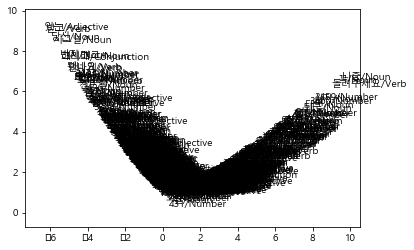

In [36]:
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings("ignore", category=DeprecationWarning) 
plt.rc('font', family='Malgun Gothic')

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

### 2. fasttext

이틀을 꼬박 모듈 설치에 매달렸는데 실패해서 fasttext를 완성하지 못했습니다 ㅠㅠ

해결한 후 fasttext, GloVe등으로 임베딩한 후 재제출하겠습니다!